In [30]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.optimizers import SGD
from keras import regularizers
import numpy as np
from keras.utils import to_categorical

##Read CSV 

In [7]:
from google.colab import files
uploaded = files.upload()

Saving phpbL6t4U_train_9.csv to phpbL6t4U_train_9 (1).csv


In [205]:
from google.colab import files
test = files.upload()

Saving phpbL6t4U_test.csv to phpbL6t4U_test.csv


##**DATA EXPLORATION**

In [206]:
gaz = pd.read_csv(('phpbL6t4U_train_9.csv'), sep=',',header=None)
gaz.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128
0,14.0652,1.021431,0.076162,0.345285,2.738004,-0.058404,-0.277899,-2.333253,1536.7488,1.400258,0.503626,1.049651,4.229569,-0.274414,-0.697501,-4.584853,2354.3862,1.322208,0.861047,1.452642,7.131562,-0.410640,-1.085102,-7.057642,2562.4917,1.324152,0.961666,1.546818,6.892549,-0.444637,-1.128489,-7.754008,934.0268,1.475627,0.278955,0.682825,4.245845,-0.176600,-0.486719,-3.482637,...,1.235104,0.505597,0.873333,4.071564,-0.271055,-0.614935,-3.671637,1505.0838,1.585151,0.408910,0.784679,2.616234,-0.256397,-0.532460,-3.034191,1624.0852,1.627958,0.444254,0.798408,3.000386,-0.284563,-0.567359,-2.999751,2184.0698,1.347984,0.539084,0.898619,3.878992,-0.389906,-0.785156,-4.407278,1973.4453,1.360274,0.494020,0.873188,3.694443,-0.344503,-0.655650,-3.430285,3
1,4046.4018,1.744527,1.227569,1.813976,4.431709,-0.907550,-1.247994,-3.670596,7687.0108,2.549173,2.557602,3.861304,6.452142,-1.721194,-2.260036,-4.635464,18101.8657,10.910528,6.585194,10.377547,12.737590,-3.237315,-4.849945,-10.359915,20147.2206,11.360018,7.268149,11.325731,13.652203,-3.514875,-5.198500,-10.095357,6221.3495,6.448052,2.348059,4.621311,6.471085,-1.537581,-2.600977,-4.838204,...,8.382372,5.347558,8.306079,10.453390,-2.569729,-3.975129,-8.398585,6721.1780,7.519613,2.485778,4.715077,7.852208,-1.729003,-3.030043,-6.016871,7395.4884,8.357009,2.652364,4.809075,8.956217,-1.960666,-3.311898,-6.659602,13536.1324,6.299667,6.904400,13.749932,18.433950,-3.106225,-5.405381,-11.371179,12122.2839,6.135079,6.115637,12.161950,15.576468,-2.743554,-4.836195,-8.346636,3
2,4918.8169,2.192877,1.541389,2.295607,5.058815,-37.090439,-69.361612,-639.547180,10205.0566,3.586874,3.548987,5.411704,7.586672,-41.941650,-87.272594,-902.250826,20503.7717,11.862207,8.026235,13.373056,16.297328,-13.276188,-21.042029,-47.692397,22728.2268,12.095187,8.824536,14.780699,18.056064,-12.691301,-19.888843,-43.405982,7568.1230,7.245981,2.891934,5.844090,8.032403,-2.989172,-4.897467,-9.675071,...,8.988214,6.454690,10.654522,13.363183,-12.765134,-20.231062,-53.193418,8277.7183,8.628880,3.085191,5.954400,9.541636,-3.308270,-5.662689,-12.164350,9430.4580,9.824441,3.303340,6.221615,9.593928,-2.828776,-4.752476,-8.253733,15106.6431,6.809725,7.883305,16.892547,21.734575,-26.569975,-48.613726,-121.517714,13525.0422,6.697454,7.016928,14.765672,19.271910,-22.234264,-41.372325,-99.788098,3
3,507.9878,2.130980,0.115009,0.335874,2.598176,-0.052970,-0.263984,-2.729686,41976.7431,4.654036,8.826130,11.512599,19.376149,-6.775106,-10.507401,-35.083440,5938.7854,2.765202,1.358196,2.488345,6.242150,-1.021006,-1.778233,-7.225966,6021.0078,2.687641,1.392464,2.619034,6.993986,-1.024156,-1.790214,-7.424393,1610.6813,1.922122,0.443975,1.123695,4.092391,-0.310566,-0.773011,-4.257648,...,2.699479,1.195207,2.058599,3.611709,-0.914159,-1.440184,-4.026725,2402.3638,2.079635,0.675432,1.579753,3.774505,-0.421480,-0.804022,-3.255582,2442.9395,2.095833,0.686327,1.518545,3.682695,-0.420433,-0.761295,-2.973219,8944.9248,2.988908,1.985467,3.810648,5.979951,-1.591878,-2.548773,-6.014547,7922.0380,2.904511,1.787390,3.324320,6.172905,-1.412451,-2.174529,-5.750028,5
4,5112.2241,2.198418,1.353879,2.310209,5.475477,-0.812125,-1.406757,-6.040008,26552.0454,4.943071,8.681239,15.247967,20.792647,-4.647062,-6.954448,-21.373610,3730.9099,2.556917,1.317897,2.680950,5.079122,-0.645479,-1.236600,-5.578664,3862.7180,2.503563,1.354679,2.660313,4.946600,-0.655506,-1.237577,-6.050420,1299.5494,1.887818,0.594943,1.826893,3.835093,-0.279749,-0.690598,-4.162843,...,2.629520,1.295020,2.573740,4.636870,-0.662031,-1.025203,-3.800017,2123.6541,2.145076,1.004152,3.108238,5.707613,-0.418697,-0.755775,-3.428350,2162.4587,2.199735,1.017801,3.000515,5.403264,-0.417297,-0.763522,-2.887297,5976.3128,2.850430,2.211785,5.01922

In [207]:
gazTest = pd.read_csv(('phpbL6t4U_test.csv'), sep=',',header=None)
gazTest.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128
0,14582.8288,4.694222,3.653544,4.993664,5.500555,-2.445382,-3.240602,-4.880242,16707.8023,4.827786,4.600063,6.939480,7.496540,-2.850779,-3.767270,-5.876586,17873.3144,2.919083,5.484148,7.376891,8.688444,-3.318585,-4.623891,-6.833172,19888.1182,3.055828,6.094463,8.305376,9.563209,-3.512413,-4.845586,-8.215886,3433.2420,2.421703,1.149491,1.940614,2.576216,-0.742373,-1.091791,-1.656164,...,2.679693,3.871694,5.248042,6.422241,-2.621056,-3.657826,-5.594230,5237.8642,2.861968,1.693821,2.730279,3.334624,-1.123666,-1.612301,-2.911305,6567.5718,3.121483,2.034504,3.170133,3.865318,-1.383239,-1.954397,-3.280288,13829.4824,2.633751,4.725701,7.118630,8.195581,-3.329530,-5.169029,-7.745167,12202.2485,2.620970,4.159873,6.319915,7.563488,-2.892682,-4.386996,-6.316269,3
1,9871.7500,3.926869,2.270046,2.861538,3.287899,-1.549454,-1.970409,-2.835650,11553.6108,4.179359,2.927066,4.000545,4.491020,-1.813491,-2.341333,-3.387407,13320.8721,2.253640,3.635366,4.602127,6.087273,-2.098829,-2.856006,-5.035082,15023.0928,2.339672,4.118653,5.210257,6.486328,-2.233639,-3.154118,-6.209560,2845.4082,2.031691,0.834388,1.312155,1.733216,-0.534624,-0.800658,-1.572218,...,2.091634,2.505238,3.261328,4.492531,-1.614148,-2.248456,-4.064484,4228.7503,2.309106,1.219333,1.820240,2.505983,-0.794919,-1.186954,-2.212578,5310.7695,2.488567,1.484600,2.111575,2.908363,-0.967265,-1.400942,-2.655717,10196.2480,2.081524,3.004758,4.150282,5.442077,-2.138423,-3.133880,-4.837288,8991.6728,2.071189,2.656234,3.639710,4.577029,-1.849404,-2.696921,-4.206152,3
2,7177.9505,2.833037,1.412510,1.766412,2.388063,-1.162013,-1.478800,-2.124272,8599.5235,2.819195,1.813263,2.289709,3.066195,-1.417682,-1.774233,-2.736654,33075.1218,11.659055,12.471065,24.142770,26.394674,-8.545025,-12.478196,-15.873305,33031.5041,11.193263,12.513011,24.609560,26.502346,-8.583872,-12.867361,-16.175395,3543.4785,3.130374,1.467126,4.387263,5.915481,-0.832268,-1.313178,-1.911053,...,11.643139,10.934595,21.421202,23.528738,-7.562136,-10.897289,-15.268782,6386.2474,4.408941,2.394424,6.812445,8.907543,-1.630032,-2.802191,-3.894756,7039.3220,4.699855,2.487250,6.493149,8.361378,-1.704834,-2.708705,-3.898830,38775.6840,12.063655,16.745036,42.464600,48.139766,-10.811602,-19.120047,-25.095349,35471.5737,11.692460,14.581054,35.321597,40.119253,-9.456846,-15.350262,-19.462482,2
3,4888.5137,1.262550,3.344196,5.902070,10.575370,-1.374883,-2.209390,-8.650742,2297.2598,1.085039,2.971303,5.899188,13.241137,-1.395080,-2.436636,-11.983560,1070.0889,1.343308,1.165571,3.891287,5.807385,-0.313950,-0.621867,-3.241772,1133.8418,1.349034,1.211109,3.825812,6.768098,-0.330181,-0.648244,-3.264506,498.7616,1.251589,0.737374,2.482714,4.585277,-0.174659,-0.422915,-2.260580,...,1.394266,1.185988,3.474406,6.288029,-0.326380,-0.635671,-3.270366,647.6453,1.334827,0.874572,3.106785,5.781307,-0.202972,-0.515128,-3.420907,559.0913,1.307358,0.745627,2.693215,5.732193,-0.185136,-0.460207,-2.979190,2006.5064,1.469639,2.576799,8.055501,12.375902,-0.589965,-1.078979,-4.389298,1779.1589,1.468477,2.468782,8.173273,12.387432,-0.545187,-0.988019,-3.236341,1
4,379.2227,1.078633,0.209129,0.606715,3.549566,-0.218088,-0.578244,-4.441821,3431.0268,1.630445,0.873006,1.435122,5.252617,-0.564088,-1.182762,-6.518753,9344.4571,3.716578,2.983671,4.681555,7.874317,-1.427051,-2.443423,-9.153570,9754.3459,3.676650,3.067304,4.890472,8.646918,-1.480591,-2.482102,-9.589567,865.1157,1.517771,0.335965,0.842168,3.452397,-0.159553,-0.522271,-3.828374,...,3.605488,2.626074,4.259046,6.310772,-1.224065,-1.838941,-5.729374,1683.3589,1.735971,0.628419,1.399016,2.970096,-0.285954,-0.591704,-2.846899,1853.5372,1.814921,0.672386,1.394195,3.715877,-0.307463,-0.620772,-3.093924,10646.9565,3.396960,3.852998,6.746883,9.757751,-1.64240

In [208]:
gazTest.shape #(2782, 129)

(2782, 129)

In [209]:
gaz.shape #(11128, 129)

(11128, 129)

In [210]:
gaz.dtypes

0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
124    float64
125    float64
126    float64
127    float64
128      int64
Length: 129, dtype: object

In [211]:
import sklearn
gazShuffle = sklearn.utils.shuffle(gaz)

In [ ]:
x = gazShuffle.iloc[:,range(128)]
print(type(x))           #data frame
print(x.shape)           #(11127, 128)

y = gazShuffle.iloc[:,[128]]
print(y.shape)           #(11127, 1)

y=y.values

In [253]:
xTest = gazTest.iloc[:,range(128)]
yTest = gazTest.iloc[:,[128]]
yTest=yTest.values
yTest = to_categorical(yTest)

In [213]:
np.unique(y)

array([1, 2, 3, 4, 5, 6])

##DATA PREPARATION

In [214]:

y = to_categorical(y)
print(y.shape)        #(1599,11)
print(y[0])

(11128, 7)
[0. 0. 0. 0. 0. 0. 1.]


In [215]:
n_train = int(x.shape[0]*80/100) #8902

In [216]:
n_train

8902

In [217]:
trainX, testX = x[:n_train], x[n_train:]
trainy, testy = y[:n_train], y[n_train:]

In [218]:
trainX.shape
trainy.shape

(8902, 7)

In [219]:
testX.shape
testy.shape

(2226, 7)

##CREATION MODEL

In [220]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(40, activation='relu', input_shape=(128,)))
original_model.add(layers.Dense(40, activation='relu'))
original_model.add(layers.Dense(7, activation='sigmoid'))

original_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [221]:
 original_hist = original_model.fit(
 trainX, trainy,
 epochs= 30,
 batch_size = 512,
 validation_data=(testX, testy)
)

Epoch 1/30
18/18 [==============================] - 1s 19ms/step - loss: 7229.3054 - acc: 0.2565 - val_loss: 1125.5060 - val_acc: 0.4834
Epoch 2/30
18/18 [==============================] - 0s 5ms/step - loss: 795.0433 - acc: 0.4993 - val_loss: 247.8652 - val_acc: 0.6137
Epoch 3/30
18/18 [==============================] - 0s 6ms/step - loss: 296.9437 - acc: 0.6019 - val_loss: 158.1889 - val_acc: 0.6734
Epoch 4/30
18/18 [==============================] - 0s 6ms/step - loss: 193.4105 - acc: 0.6847 - val_loss: 149.1333 - val_acc: 0.7004
Epoch 5/30
18/18 [==============================] - 0s 5ms/step - loss: 168.9790 - acc: 0.7192 - val_loss: 131.2845 - val_acc: 0.7448
Epoch 6/30
18/18 [==============================] - 0s 5ms/step - loss: 158.5432 - acc: 0.7372 - val_loss: 80.3933 - val_acc: 0.8419
Epoch 7/30
18/18 [==============================] - 0s 6ms/step - loss: 93.3164 - acc: 0.8151 - val_loss: 66.5629 - val_acc: 0.8419
Epoch 8/30
18/18 [==============================] - 0s 6ms/ste

In [227]:
print(original_hist.history ['acc'][29])#0.9454055428504944
print(original_hist.history ['val_acc'][29])#0.9775381684303284

0.9338350892066956
0.9546271562576294


Text(0.5, 1.0, 'First Model')

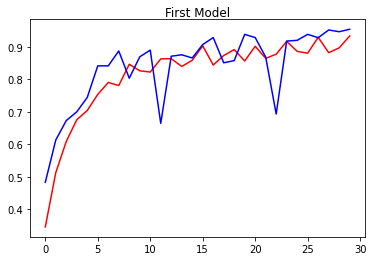

In [228]:
import matplotlib.pyplot as plt
plt.plot (original_hist.history ['acc'], label ='train', color ='r')
plt.plot (original_hist.history['val_acc'], label ='test', color ='b')
plt.title ( "First Model", pad = -50)

# function to choose the best lrate

In [235]:
def fit_modelLrate(trainX, trainy, testX, testy, lrate):

  model = models.Sequential()
  model.add(layers.Dense(40, activation='relu', input_shape=(128,)))
  model.add(layers.Dense(40, activation='relu'))
  model.add(layers.Dense(7, activation='sigmoid'))

  optimizer = tf.keras.optimizers.RMSprop(
    learning_rate=lrate,
    rho=0.9,
    momentum= 0.00,
    epsilon=1e-07,
    centered=False,
    name="RMSprop",
)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc'])
  history = model.fit(trainX, trainy,epochs= 30,batch_size = 512,validation_data=(testX, testy))

  plt.plot (history.history ['acc'], label ='train', color ='r')
  plt.plot (history.history['val_acc'], label ='test', color ='b')
  plt.title ('Learning rate ='+ str ( lrate ) , pad = -50)

Epoch 1/30
18/18 [==============================] - 1s 21ms/step - loss: 68224660.2519 - acc: 0.1378 - val_loss: 63035.7891 - val_acc: 0.2273
Epoch 2/30
18/18 [==============================] - 0s 6ms/step - loss: 36131.6460 - acc: 0.2109 - val_loss: 2873.6340 - val_acc: 0.1806
Epoch 3/30
18/18 [==============================] - 0s 6ms/step - loss: 2701.2183 - acc: 0.2116 - val_loss: 1021.0298 - val_acc: 0.2192
Epoch 4/30
18/18 [==============================] - 0s 7ms/step - loss: 613.0741 - acc: 0.2220 - val_loss: 511.5659 - val_acc: 0.2192
Epoch 5/30
18/18 [==============================] - 0s 7ms/step - loss: 184.8488 - acc: 0.2162 - val_loss: 1064.0554 - val_acc: 0.2192
Epoch 6/30
18/18 [==============================] - 0s 6ms/step - loss: 1054.9020 - acc: 0.2206 - val_loss: 4276.4058 - val_acc: 0.2183
Epoch 7/30
18/18 [==============================] - 0s 6ms/step - loss: 1148.4081 - acc: 0.2073 - val_loss: 1199.8955 - val_acc: 0.1204
Epoch 8/30
18/18 [==========================

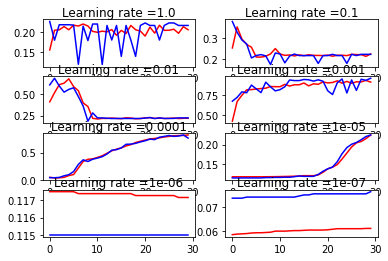

In [237]:
learning_rates = [1E-0 , 1E-1 , 1E-2 , 1E-3 , 1E-4 , 1E-5 , 1E-6 , 1E-7]

for i in range(len(learning_rates)): 

  # determine the plot number
  plot_no = 420 + (i +1)
  plt.subplot (plot_no)

  # fit model and plot learning curves for a learning rate
  fit_modelLrate( trainX , trainy , testX , testy , learning_rates[i])

# show learning curves
plt.show()
  


The best learning rate is 0.001 because it's more accurate

## function to choose the best Momentum

In [177]:
def fit_modelMomentum(trainX, trainy, testX, testy, moment):

  model = models.Sequential()
  model.add(layers.Dense(40, activation='relu', input_shape=(128,)))
  model.add(layers.Dense(40, activation='relu'))
  model.add(layers.Dense(7, activation='sigmoid'))

  optimizer = tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum= moment,
    epsilon=1e-07,
    centered=False,
    name="RMSprop",
)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc'])
  history = model.fit(trainX, trainy,epochs= 30,batch_size = 512,validation_data=(testX, testy))

  plt.plot (history.history ['acc'], label ='train', color ='r')
  plt.plot (history.history['val_acc'], label ='test', color ='b')
  plt.title ('momemtum ='+ str ( moment ) , pad = -50)



Epoch 1/30
18/18 [==============================] - 1s 21ms/step - loss: 6918.8398 - acc: 0.2133 - val_loss: 545.5442 - val_acc: 0.4389
Epoch 2/30
18/18 [==============================] - 0s 6ms/step - loss: 420.6363 - acc: 0.5576 - val_loss: 263.9475 - val_acc: 0.6074
Epoch 3/30
18/18 [==============================] - 0s 6ms/step - loss: 274.6067 - acc: 0.6286 - val_loss: 245.2380 - val_acc: 0.6011
Epoch 4/30
18/18 [==============================] - 0s 7ms/step - loss: 231.4032 - acc: 0.6509 - val_loss: 136.0519 - val_acc: 0.6882
Epoch 5/30
18/18 [==============================] - 0s 7ms/step - loss: 169.3506 - acc: 0.6927 - val_loss: 100.5921 - val_acc: 0.7421
Epoch 6/30
18/18 [==============================] - 0s 7ms/step - loss: 128.7760 - acc: 0.7364 - val_loss: 124.6786 - val_acc: 0.7749
Epoch 7/30
18/18 [==============================] - 0s 6ms/step - loss: 94.8896 - acc: 0.7774 - val_loss: 52.4073 - val_acc: 0.8374
Epoch 8/30
18/18 [==============================] - 0s 7ms/ste

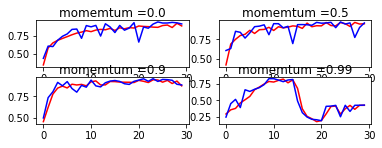

In [238]:
#learning_rates = [1E-0 , 1E-1 , 1E-2 , 1E-3 , 1E-4 , 1E-5 , 1E-6 , 1E-7]
momentums = [0.0, 0.5, 0.9, 0.99]

for i in range(len(momentums)): 

  # determine the plot number
  plot_no = 420 + (i +1)
  plt.subplot (plot_no)

  # fit model and plot learning curves for a learning rate
  fit_modelMomentum( trainX , trainy , testX , testy , momentums[i])

# show learning curves
plt.show()

The best momentum is 0.5 because it's more stable and the best accuracy 

# function to choose the best optimizer

In [242]:
def fit_modelOPtimizer(trainX, trainy, testX, testy, optimizer):
  # define model
  model = models.Sequential()
  model.add(layers.Dense(40, activation='relu', input_shape=(128,)))
  model.add(layers.Dense(40, activation='relu'))
  model.add(layers.Dense(7, activation='sigmoid'))

  
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc'])
  history = model.fit(trainX, trainy,epochs= 30,batch_size = 512,validation_data=(testX, testy))
  # plot learning curves
  plt.plot(history.history['acc'], label='train')
  plt.plot(history.history['val_acc'], label='test')
  plt.title(str(optimizer), pad=-80)

Epoch 1/30
18/18 [==============================] - 1s 21ms/step - loss: nan - acc: 0.1108 - val_loss: nan - val_acc: 0.0000e+00
Epoch 2/30
18/18 [==============================] - 0s 6ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/30
18/18 [==============================] - 0s 6ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/30
18/18 [==============================] - 0s 6ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/30
18/18 [==============================] - 0s 6ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/30
18/18 [==============================] - 0s 6ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 7/30
18/18 [==============================] - 0s 6ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 8/30
18/18 [==============================] - 0s 7ms/step - loss: nan - a

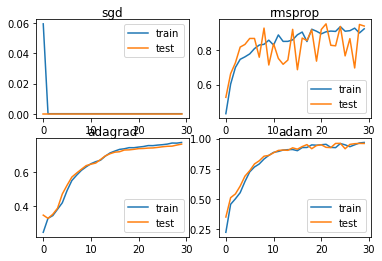

In [243]:
methods = ['sgd', 'rmsprop', 'adagrad', 'adam']
for i in range(len(methods)):
  # determine the plot number
  plot_no = 220 + (i+1)
  plt.subplot(plot_no)
  # fit model and plot learning curves for a decay rate
  fit_modelOPtimizer(trainX, trainy, testX, testy, methods[i])
  # show learning curves
  plt.legend()
plt.show()

The best optimizer is adam because the growth (la croissance) is uniform and we have an accuracy almost at 100% from 10 epochs

Comparason of with ADAM model and RMSProp model

In [247]:
basic_model = models.Sequential()
basic_model.add(layers.Dense(40, activation='relu', input_shape=(128,)))
basic_model.add(layers.Dense(40, activation='relu'))
basic_model.add(layers.Dense(7, activation='sigmoid'))

optimizer = tf.keras.optimizers.RMSprop(
  learning_rate=0.001,
  rho=0.9,
  momentum= 0.5,
  epsilon=1e-07,
  centered=False,
  name="RMSprop",
)
basic_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc'])

basic_hist =basic_model.fit(
 trainX, trainy,
 epochs= 30,
 batch_size = 512,
 validation_data=(testX, testy)
)

Epoch 1/30
18/18 [==============================] - 1s 19ms/step - loss: 5821.2205 - acc: 0.2823 - val_loss: 272.4364 - val_acc: 0.6622
Epoch 2/30
18/18 [==============================] - 0s 5ms/step - loss: 198.7288 - acc: 0.6737 - val_loss: 189.4898 - val_acc: 0.6312
Epoch 3/30
18/18 [==============================] - 0s 6ms/step - loss: 143.0363 - acc: 0.7009 - val_loss: 54.9513 - val_acc: 0.8571
Epoch 4/30
18/18 [==============================] - 0s 5ms/step - loss: 80.8245 - acc: 0.8357 - val_loss: 250.8638 - val_acc: 0.7098
Epoch 5/30
18/18 [==============================] - 0s 5ms/step - loss: 101.0472 - acc: 0.8274 - val_loss: 36.3193 - val_acc: 0.9088
Epoch 6/30
18/18 [==============================] - 0s 6ms/step - loss: 183.3276 - acc: 0.7704 - val_loss: 36.2835 - val_acc: 0.8845
Epoch 7/30
18/18 [==============================] - 0s 5ms/step - loss: 92.7687 - acc: 0.8327 - val_loss: 41.9333 - val_acc: 0.8895
Epoch 8/30
18/18 [==============================] - 0s 6ms/step - 

In [246]:
final_model = models.Sequential()
final_model.add(layers.Dense(40, activation='relu', input_shape=(128,)))
final_model.add(layers.Dense(40, activation='relu'))
final_model.add(layers.Dense(7, activation='sigmoid'))
final_model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['acc'])

final_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc'])

final_hist =final_model.fit(
 trainX, trainy,
 epochs= 30,
 batch_size = 512,
 validation_data=(testX, testy)
)

Epoch 1/30
18/18 [==============================] - 1s 20ms/step - loss: 8633.0527 - acc: 0.1974 - val_loss: 156.0569 - val_acc: 0.7053
Epoch 2/30
18/18 [==============================] - 0s 6ms/step - loss: 169.9432 - acc: 0.6978 - val_loss: 217.2166 - val_acc: 0.6550
Epoch 3/30
18/18 [==============================] - 0s 5ms/step - loss: 113.8536 - acc: 0.7682 - val_loss: 156.1227 - val_acc: 0.7138
Epoch 4/30
18/18 [==============================] - 0s 6ms/step - loss: 148.6161 - acc: 0.7672 - val_loss: 53.5682 - val_acc: 0.8351
Epoch 5/30
18/18 [==============================] - 0s 5ms/step - loss: 92.0907 - acc: 0.8201 - val_loss: 181.9424 - val_acc: 0.7601
Epoch 6/30
18/18 [==============================] - 0s 6ms/step - loss: 68.9426 - acc: 0.8487 - val_loss: 58.5009 - val_acc: 0.8311
Epoch 7/30
18/18 [==============================] - 0s 5ms/step - loss: 72.3822 - acc: 0.8352 - val_loss: 20.4088 - val_acc: 0.9412
Epoch 8/30
18/18 [==============================] - 0s 5ms/step - 

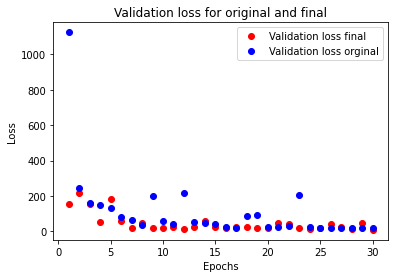

In [248]:
original_val_loss = original_hist.history['val_loss']
final_val_loss = final_hist.history['val_loss']

epochs = range(1, len(val_loss) + 1)

plt.plot(epochs, final_val_loss, 'bo', label='Validation loss final', color ='red')
plt.plot(epochs, original_val_loss, 'bo', label='Validation loss orginal')
plt.title('Validation loss for original and final')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Tuning of the number of neuron and number of hidden layers

In [261]:
tunning_model = models.Sequential()
tunning_model.add(layers.Dense(60, activation='relu', input_shape=(128,)))
tunning_model.add(layers.Dense(60, activation='relu'))
tunning_model.add(layers.Dense(60, activation='relu'))
tunning_model.add(layers.Dense(7, activation='sigmoid'))
tunning_model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['acc'])

tunning_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc'])

tunning_hist =tunning_model.fit(
 trainX, trainy,
 epochs= 30,
 batch_size = 512,
 validation_data=(testX, testy)
)

Epoch 1/30
18/18 [==============================] - 1s 23ms/step - loss: 1554.3514 - acc: 0.4538 - val_loss: 49.6294 - val_acc: 0.7633
Epoch 2/30
18/18 [==============================] - 0s 7ms/step - loss: 51.1630 - acc: 0.7827 - val_loss: 58.3631 - val_acc: 0.7543
Epoch 3/30
18/18 [==============================] - 0s 7ms/step - loss: 42.3762 - acc: 0.8084 - val_loss: 49.2506 - val_acc: 0.7996
Epoch 4/30
18/18 [==============================] - 0s 7ms/step - loss: 29.7095 - acc: 0.8433 - val_loss: 68.7753 - val_acc: 0.8059
Epoch 5/30
18/18 [==============================] - 0s 7ms/step - loss: 41.5115 - acc: 0.8065 - val_loss: 14.7592 - val_acc: 0.8976
Epoch 6/30
18/18 [==============================] - 0s 7ms/step - loss: 24.6971 - acc: 0.8732 - val_loss: 16.2824 - val_acc: 0.9061
Epoch 7/30
18/18 [==============================] - 0s 7ms/step - loss: 12.9386 - acc: 0.9116 - val_loss: 33.5422 - val_acc: 0.7740
Epoch 8/30
18/18 [==============================] - 0s 7ms/step - loss: 3

In [262]:
tunning_model.evaluate(xTest,yTest,verbose=2)

87/87 - 0s - loss: 8.8058 - acc: 0.9468


[8.80584716796875, 0.9468008875846863]

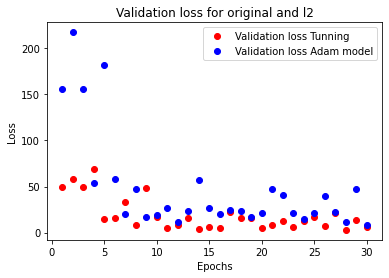

In [263]:
val_loss = final_hist.history['val_loss']
val_loss_tunning = tunning_hist.history['val_loss']

epochs = range(1, len(val_loss) + 1)

plt.plot(epochs, val_loss_tunning, 'bo', label='Validation loss Tunning', color ='red')
plt.plot(epochs, val_loss, 'bo', label='Validation loss Adam model')
plt.title('Validation loss for original and l2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

With a model more specific and more complicated, we are overfitting and we are less accuracute than the adam model

## Evaluting the final model (ADAM) with test dataset

In [257]:
final_model.evaluate(xTest,yTest,verbose=2)

87/87 - 0s - loss: 18.3941 - acc: 0.9792


[18.394126892089844, 0.9791516661643982]

In [ ]:
Preprocessing data

In [266]:
from sklearn import preprocessing

In [274]:
min_max_scaler = preprocessing.MaxAbsScaler()
X = min_max_scaler.fit_transform(x)
X_train_minmax =  min_max_scaler.transform(trainX)
X_test_minmax =  min_max_scaler.transform(testX)
XTest_test_minmax =  min_max_scaler.transform(xTest)

In [281]:
finalNormalize_model = models.Sequential()
finalNormalize_model.add(layers.Dense(40, activation='relu', input_shape=(128,)))
finalNormalize_model.add(layers.Dense(40, activation='relu'))
finalNormalize_model.add(layers.Dense(7, activation='sigmoid'))
finalNormalize_model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['acc'])

finalNormalize_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc'])

finalNormalize_hist =finalNormalize_model.fit(
 X_train_minmax, trainy,
 epochs= 30,
 batch_size = 512,
 validation_data=(X_test_minmax, testy)
)

Epoch 1/30
18/18 [==============================] - 1s 15ms/step - loss: 1.7986 - acc: 0.3239 - val_loss: 1.4553 - val_acc: 0.4739
Epoch 2/30
18/18 [==============================] - 0s 5ms/step - loss: 1.3724 - acc: 0.5472 - val_loss: 1.1674 - val_acc: 0.6370
Epoch 3/30
18/18 [==============================] - 0s 5ms/step - loss: 1.0994 - acc: 0.6789 - val_loss: 0.9538 - val_acc: 0.7058
Epoch 4/30
18/18 [==============================] - 0s 5ms/step - loss: 0.8999 - acc: 0.7227 - val_loss: 0.7991 - val_acc: 0.7556
Epoch 5/30
18/18 [==============================] - 0s 5ms/step - loss: 0.7409 - acc: 0.7755 - val_loss: 0.6855 - val_acc: 0.8095
Epoch 6/30
18/18 [==============================] - 0s 5ms/step - loss: 0.6302 - acc: 0.8302 - val_loss: 0.6009 - val_acc: 0.8306
Epoch 7/30
18/18 [==============================] - 0s 5ms/step - loss: 0.5524 - acc: 0.8603 - val_loss: 0.5374 - val_acc: 0.8477
Epoch 8/30
18/18 [==============================] - 0s 5ms/step - loss: 0.4853 - acc: 0.8

In [282]:
finalNormalize_model.evaluate(XTest_test_minmax,yTest,verbose=2)

87/87 - 0s - loss: 1.6977 - acc: 0.9716


[1.6977375745773315, 0.9716031551361084]

With normalisation of the data we have a better accuracy and better loss value